In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
imputation_methods = ['mice', 'knn', 'softimpute', 'gain', 'pmm']
synthetic_types = ['ctgan', 'tvae', 'adasyn']

processed_dir = '../data/processed'
synthetic_base_dir = '../data/synthetic'

key_features = ['mayo', 'Gdańsk', 'TRANSFERYNA', 'Morfologia RDW-SD', 'Morfologia PDW'] 

In [3]:
def plot_distributions(real_df, syn_df, method, syn_type, features):
    """Plots KDE overlays for selected features."""
    valid_features = [f for f in features if f in real_df.columns and f in syn_df.columns]
    if not valid_features:
        return
        
    n_cols = 2
    n_rows = (len(valid_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    fig.suptitle(f'Distribution Comparison: {method.upper()} (Real) vs {syn_type.upper()}', fontsize=16)
    axes = axes.flatten()
    
    for i, feature in enumerate(valid_features):
        sns.kdeplot(real_df[feature], ax=axes[i], label='Real (Imputed)', color='blue', fill=True, alpha=0.3)
        sns.kdeplot(syn_df[feature], ax=axes[i], label='Synthetic', color='orange', fill=True, alpha=0.3)
        axes[i].set_title(feature)
        axes[i].legend()
        
    # Hide unused axes
    for i in range(len(valid_features), len(axes)):
        axes[i].axis('off')
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_correlation_difference(real_df, syn_df, method, syn_type):
    """Plots the difference in correlation matrices (Synthetic - Real)."""
    real_corr = real_df.corr()
    syn_corr = syn_df.corr()
    
    # Align columns just in case
    common_cols = real_corr.columns.intersection(syn_corr.columns)
    real_corr = real_corr.loc[common_cols, common_cols]
    syn_corr = syn_corr.loc[common_cols, common_cols]
    
    diff_corr = syn_corr - real_corr
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(diff_corr, cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5)
    plt.title(f'Correlation Difference (Synthetic - Real): {method.upper()} / {syn_type.upper()}')
    plt.show()

def plot_pca_comparison(real_df, syn_df, method, syn_type):
    """Plots PCA projections of Real and Synthetic data."""
    # Combine for PCA training to ensure same projection
    common_cols = real_df.columns.intersection(syn_df.columns)
    real_data = real_df[common_cols].dropna()
    syn_data = syn_df[common_cols].dropna()
    
    scaler = StandardScaler()
    pca = PCA(n_components=2)
    
    # Fit on Real, transform both
    real_scaled = scaler.fit_transform(real_data)
    syn_scaled = scaler.transform(syn_data)
    
    real_pca = pca.fit_transform(real_scaled)
    syn_pca = pca.transform(syn_scaled)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.5, label='Real (Imputed)', color='blue', s=10)
    plt.scatter(syn_pca[:, 0], syn_pca[:, 1], alpha=0.5, label='Synthetic', color='orange', s=10, marker='x')
    
    plt.title(f'PCA Comparison: {method.upper()} vs {syn_type.upper()}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()


############################################################
ANALYZING IMPUTATION METHOD: MICE
############################################################

--- Comparing with CTGAN ---


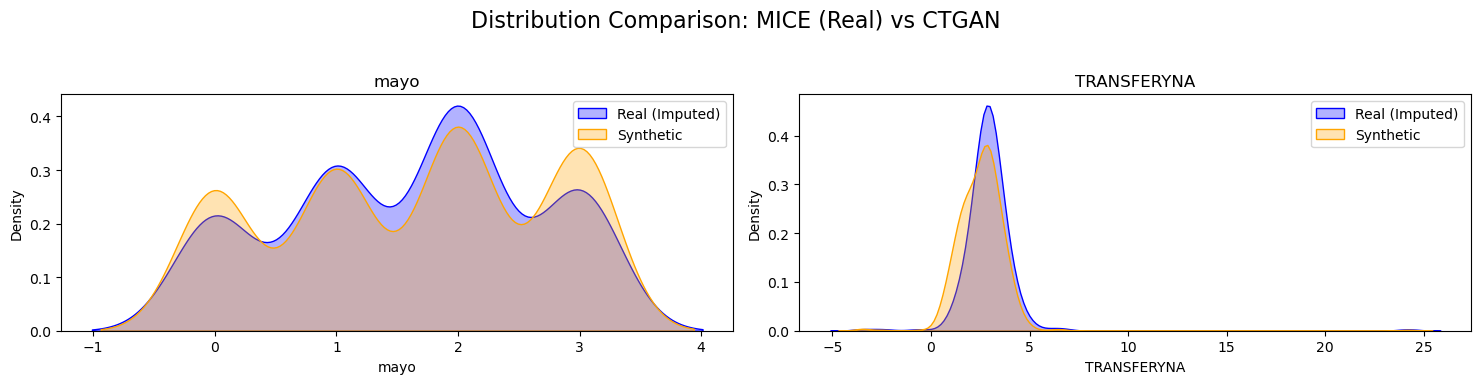

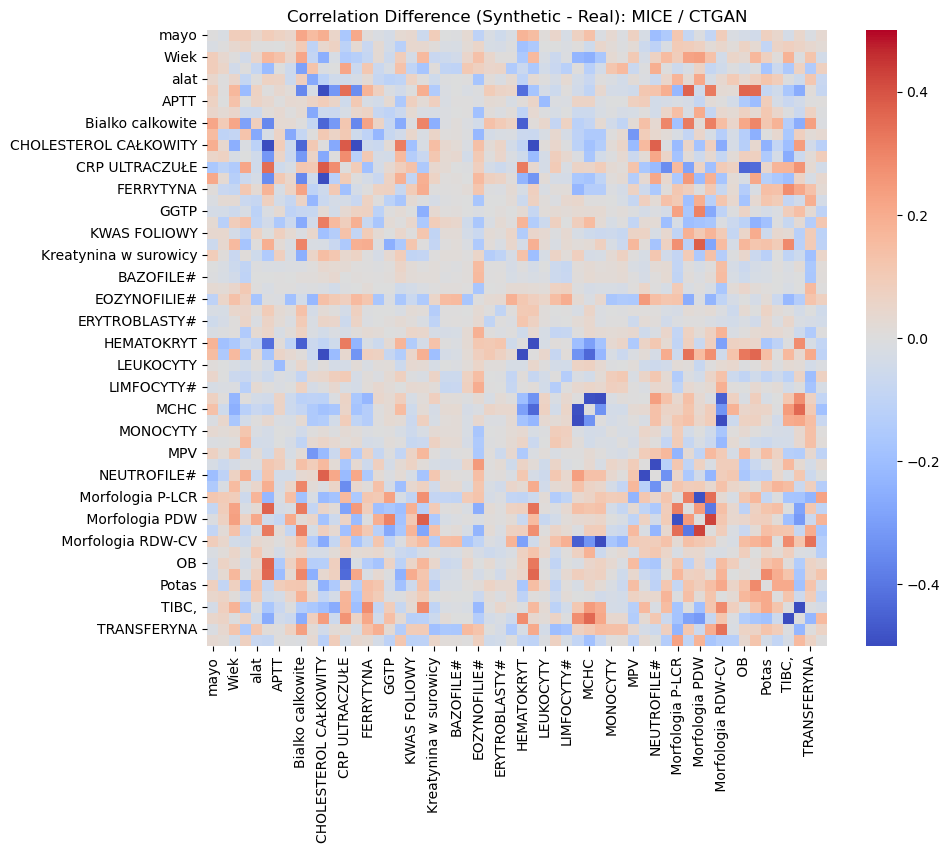

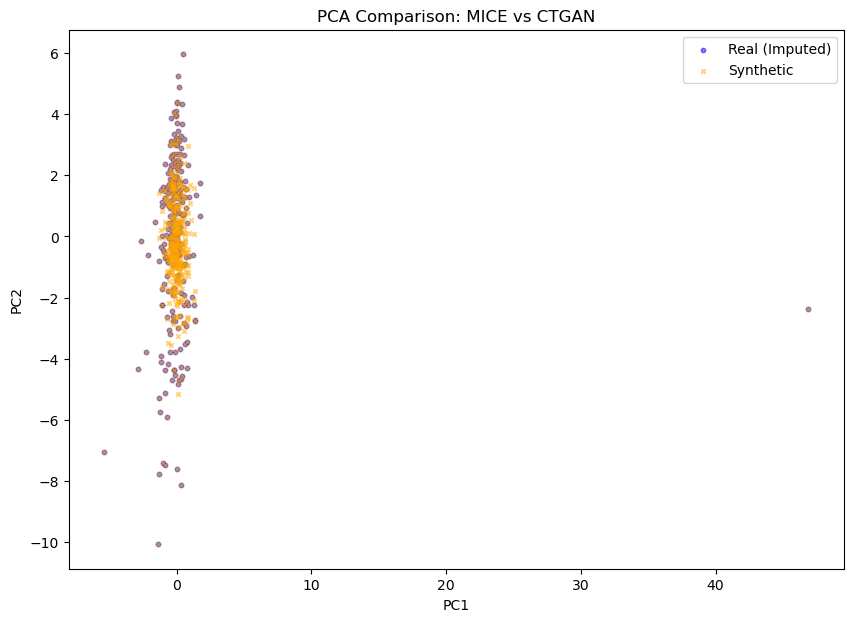

--- Comparing with TVAE ---


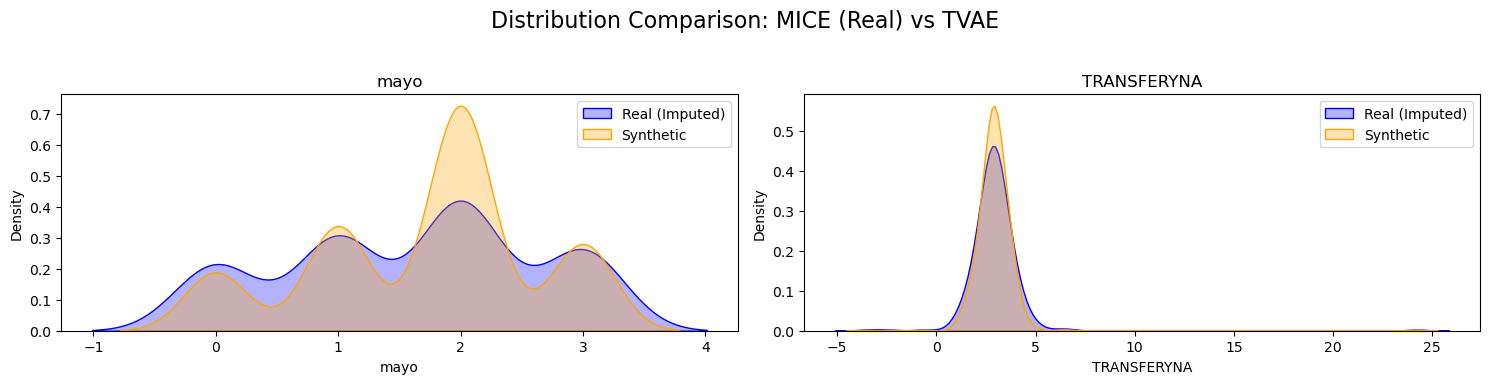

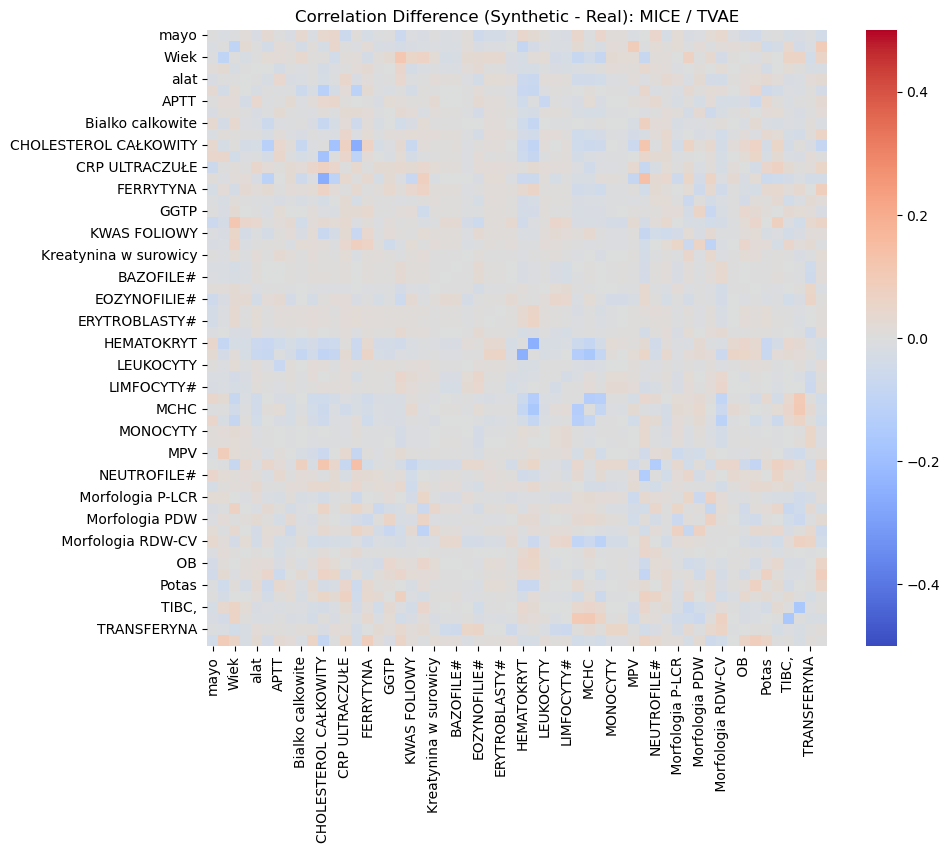

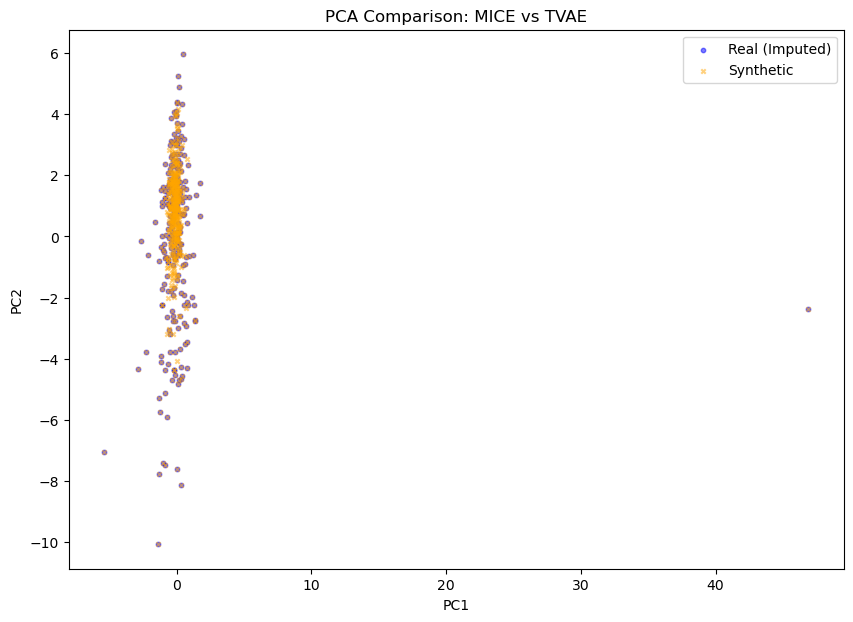

--- Comparing with ADASYN ---


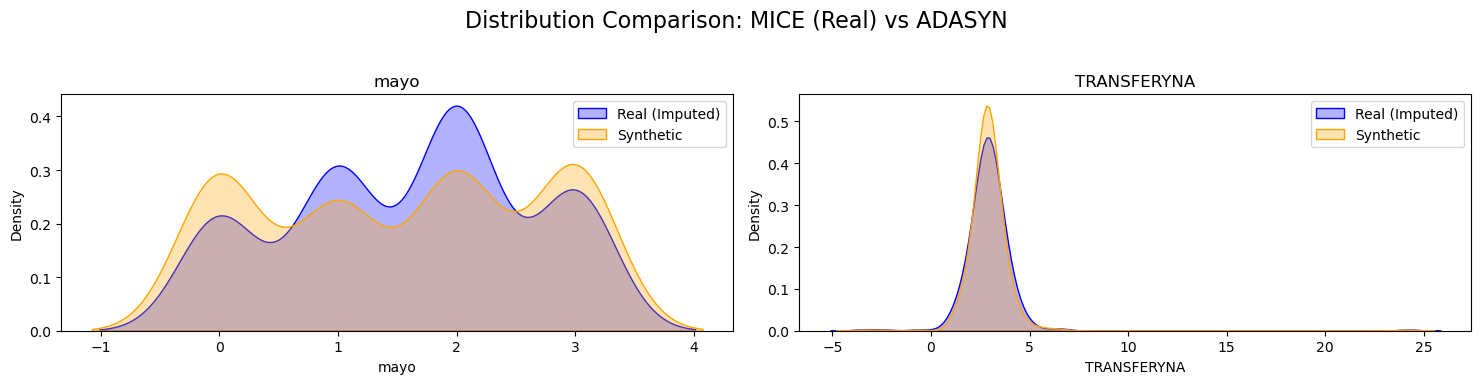

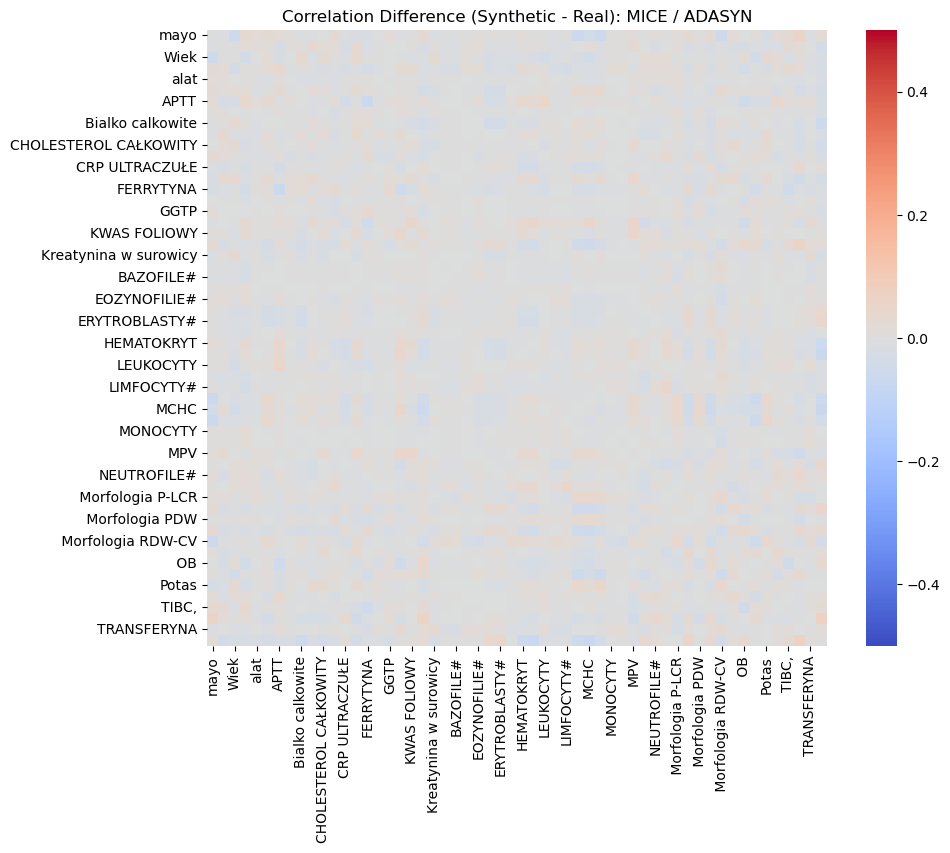

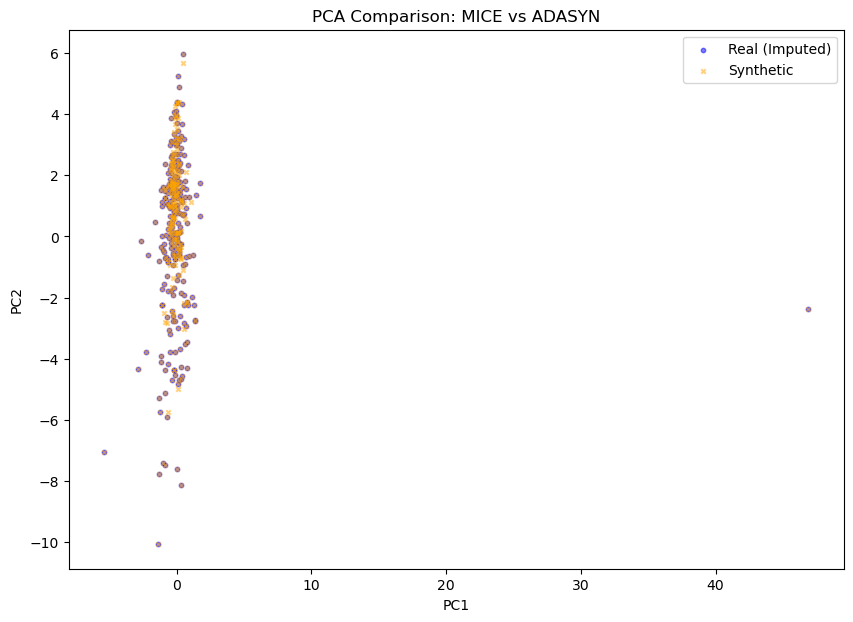


############################################################
ANALYZING IMPUTATION METHOD: KNN
############################################################

--- Comparing with CTGAN ---


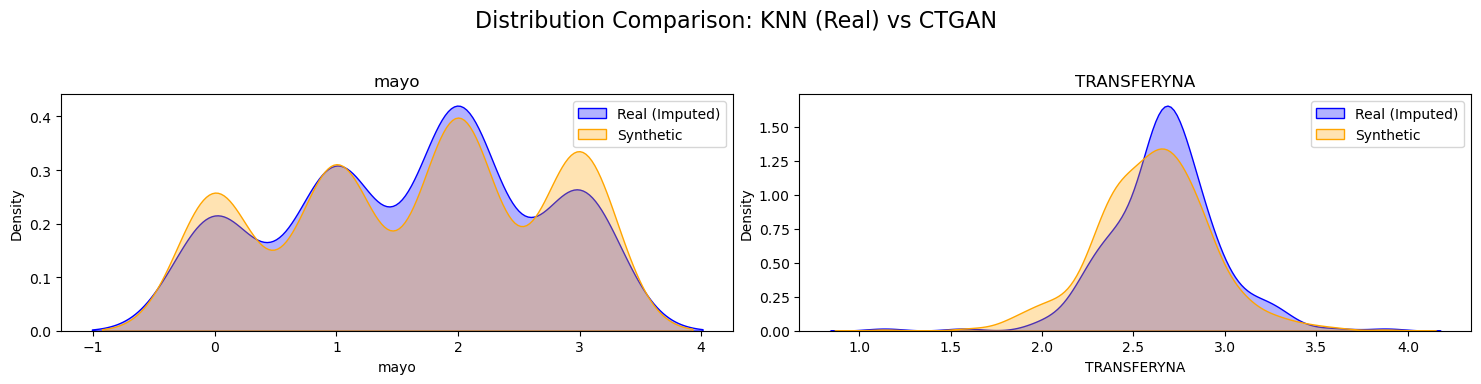

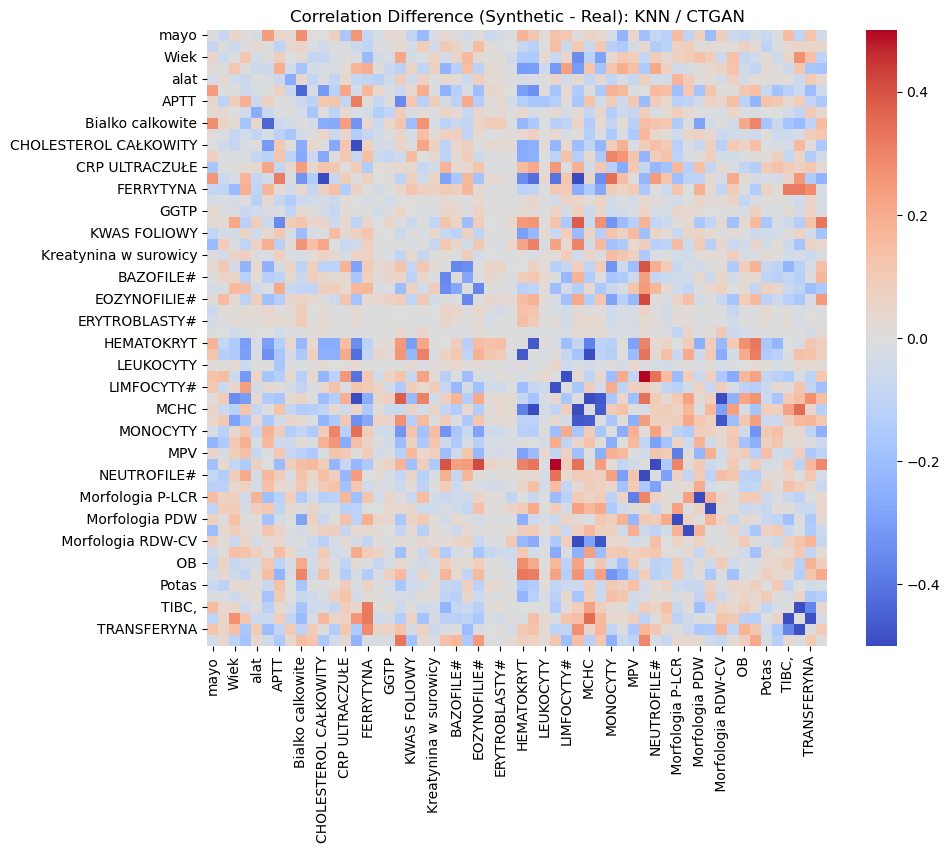

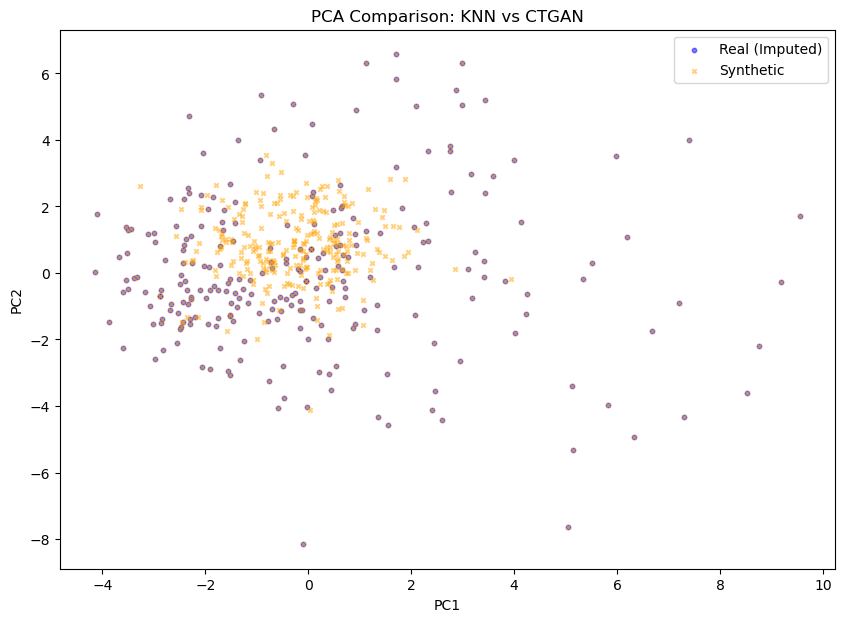

--- Comparing with TVAE ---


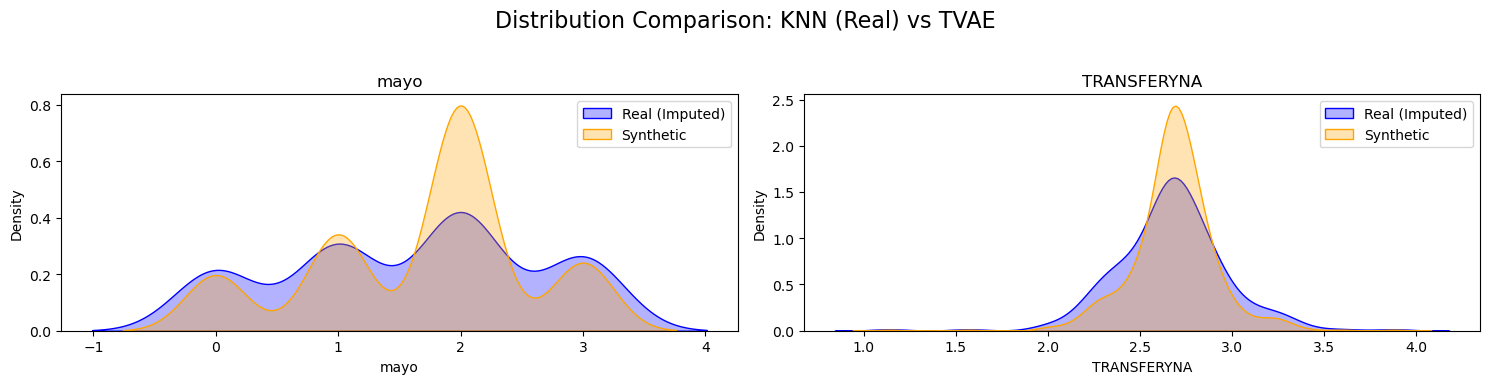

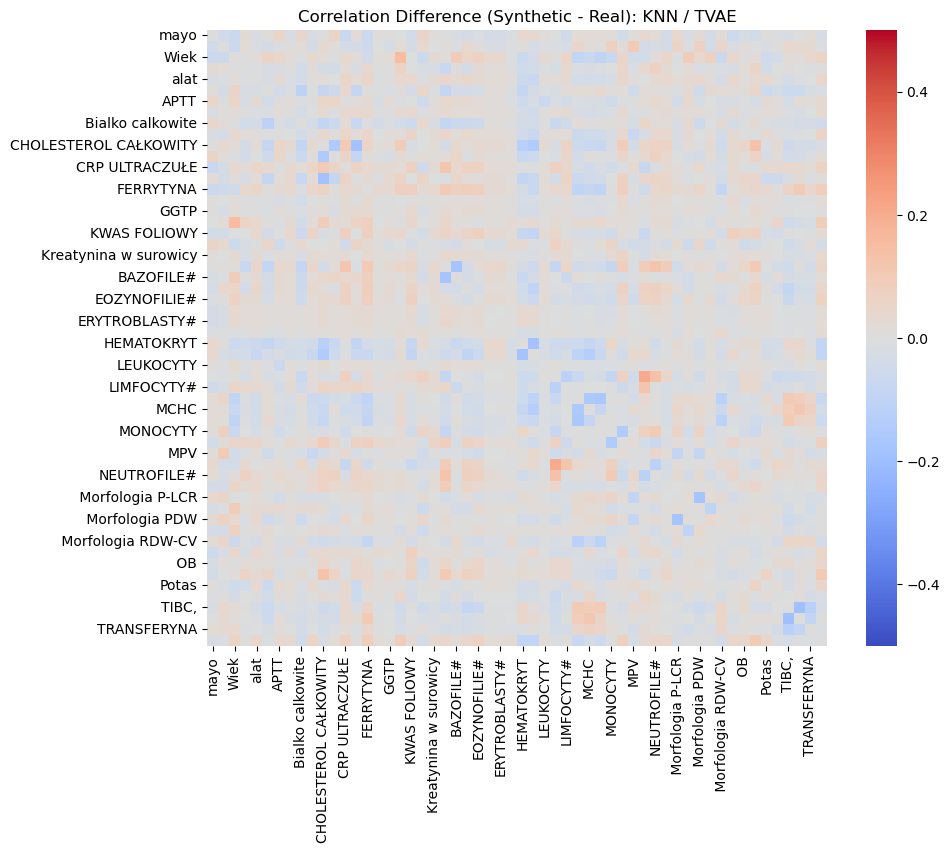

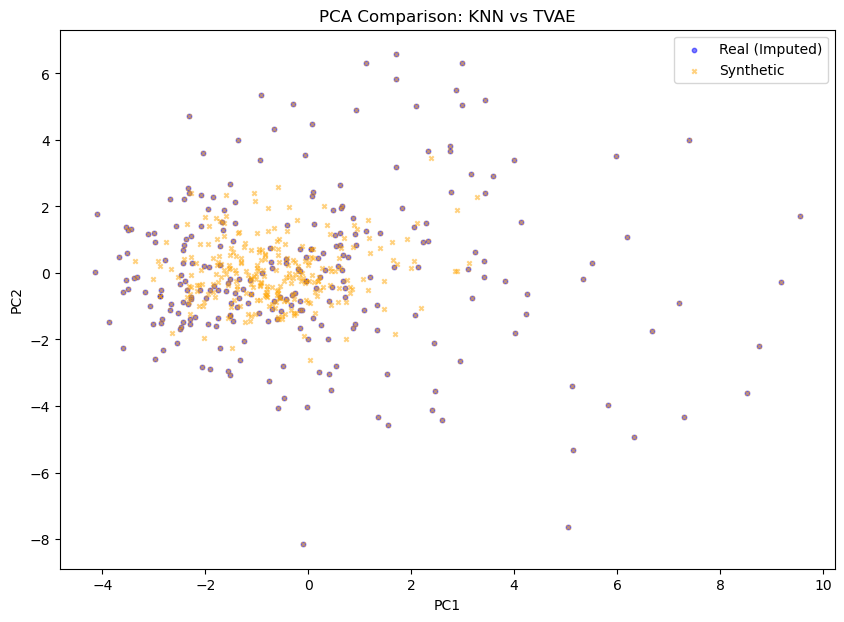

--- Comparing with ADASYN ---


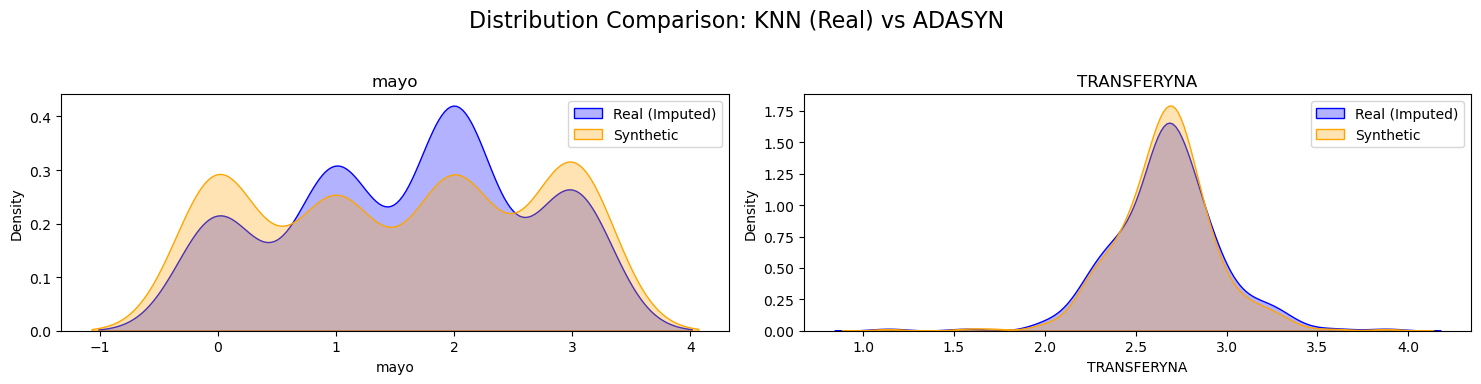

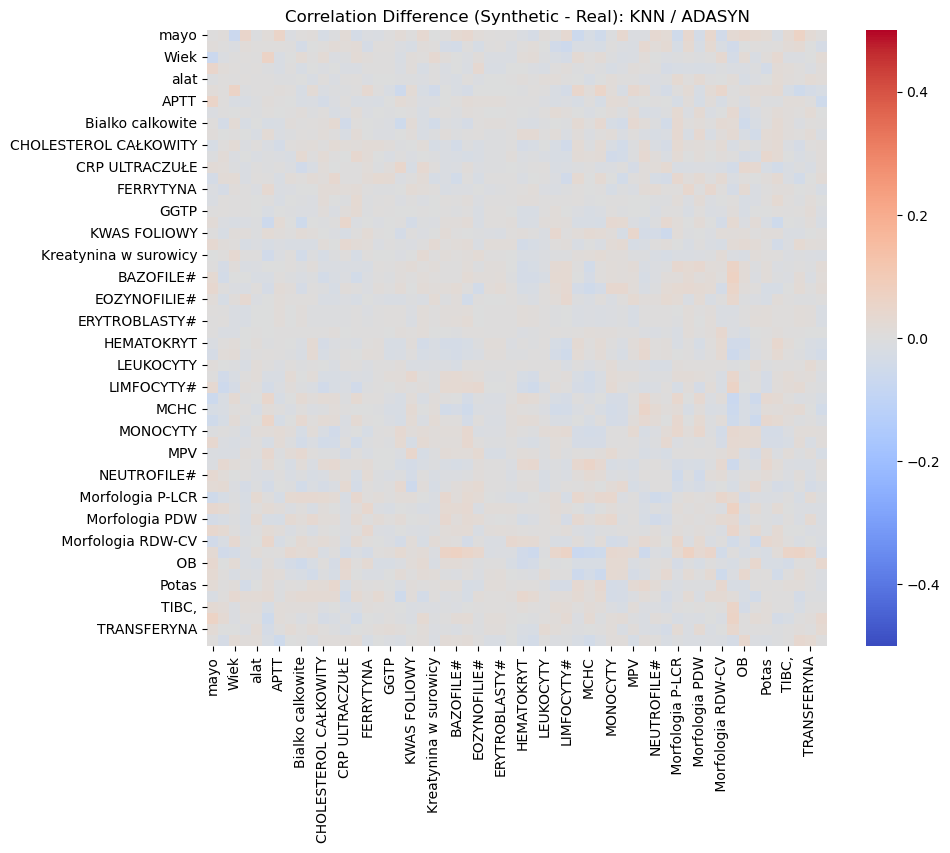

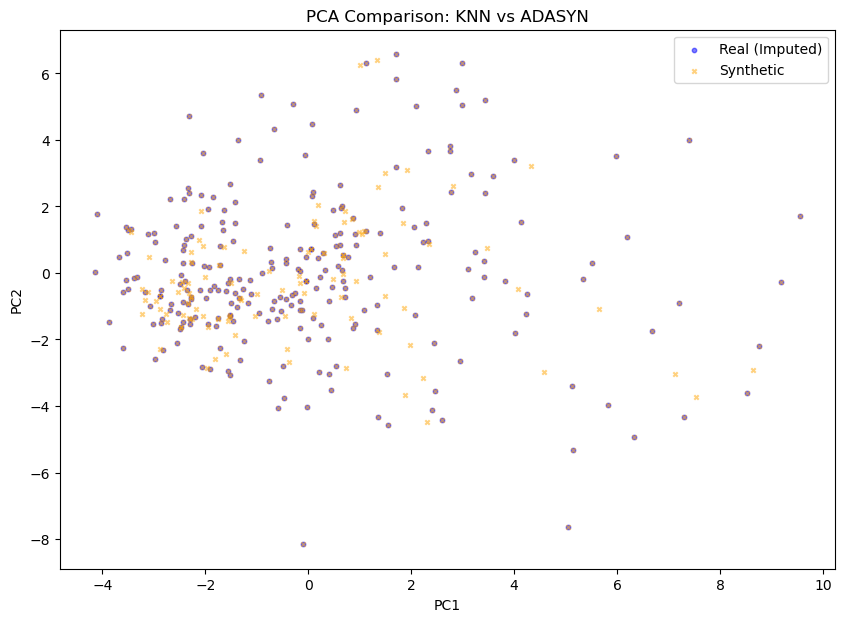


############################################################
ANALYZING IMPUTATION METHOD: SOFTIMPUTE
############################################################

--- Comparing with CTGAN ---


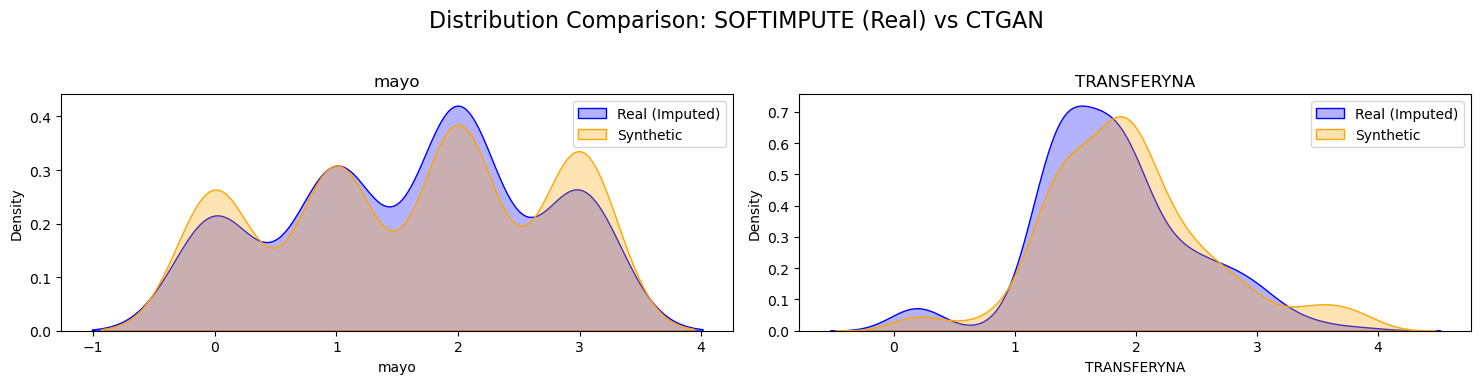

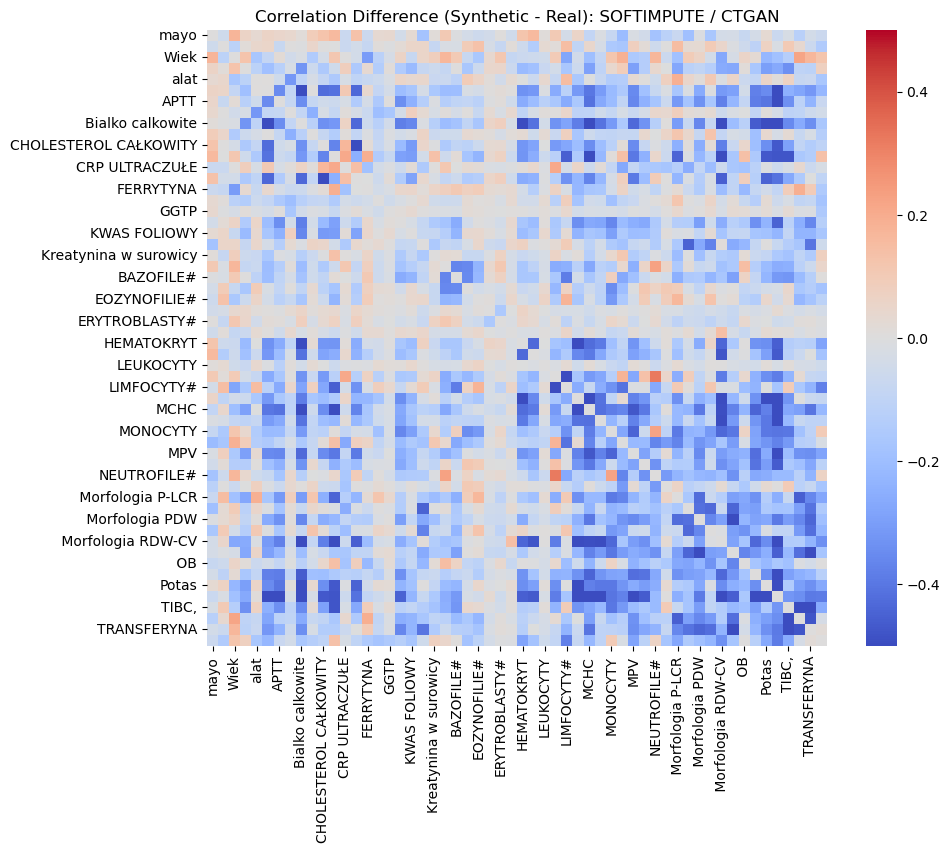

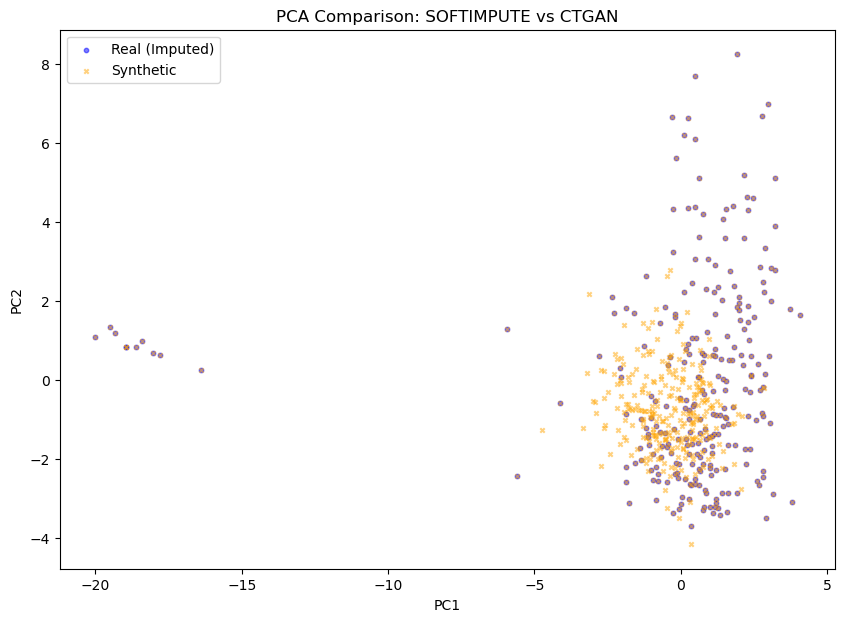

--- Comparing with TVAE ---


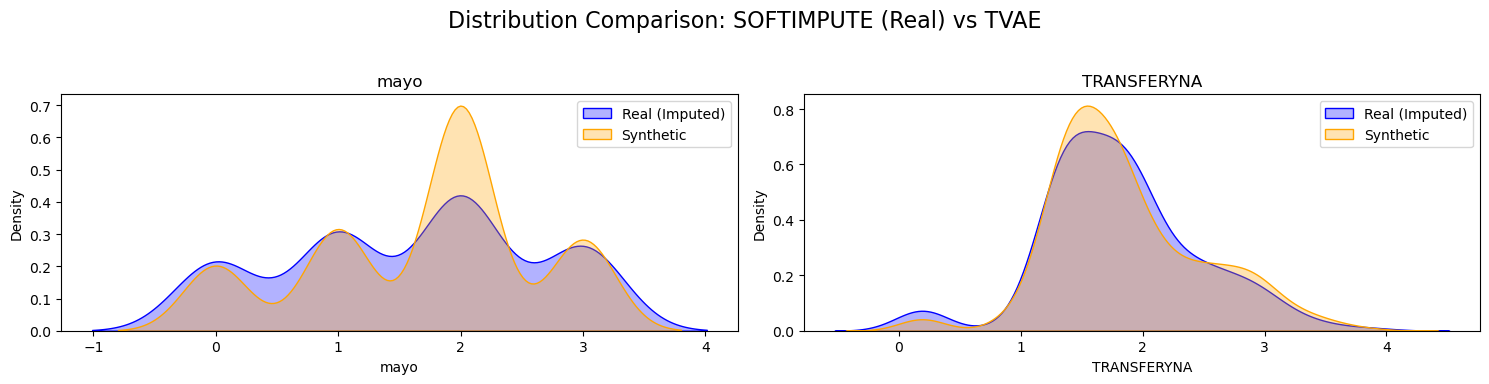

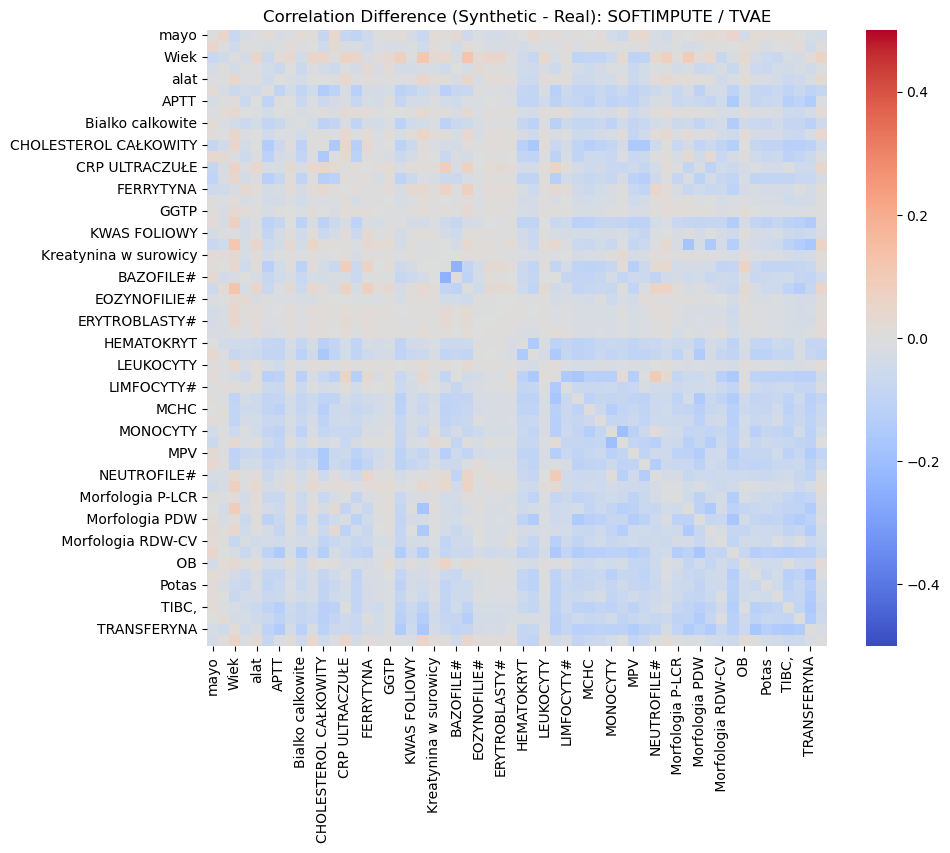

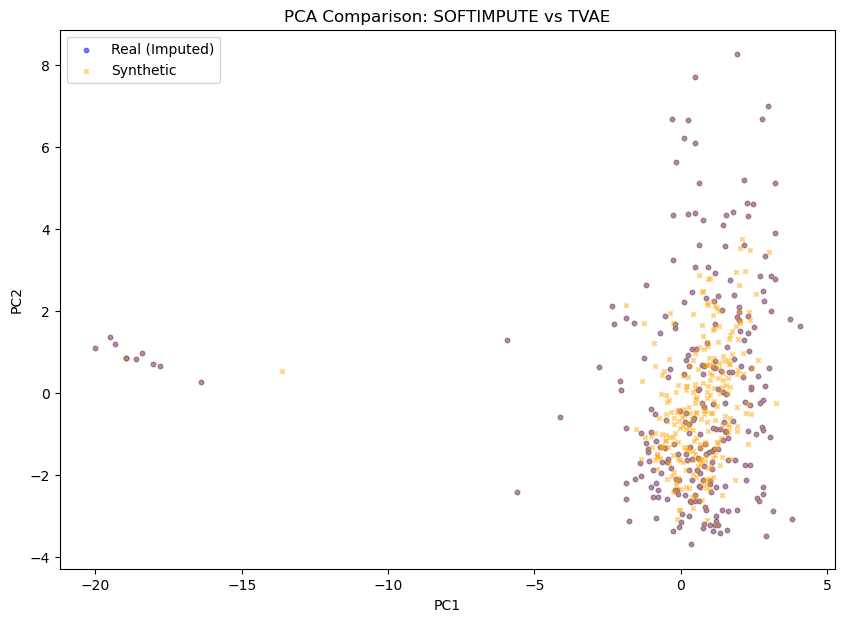

--- Comparing with ADASYN ---


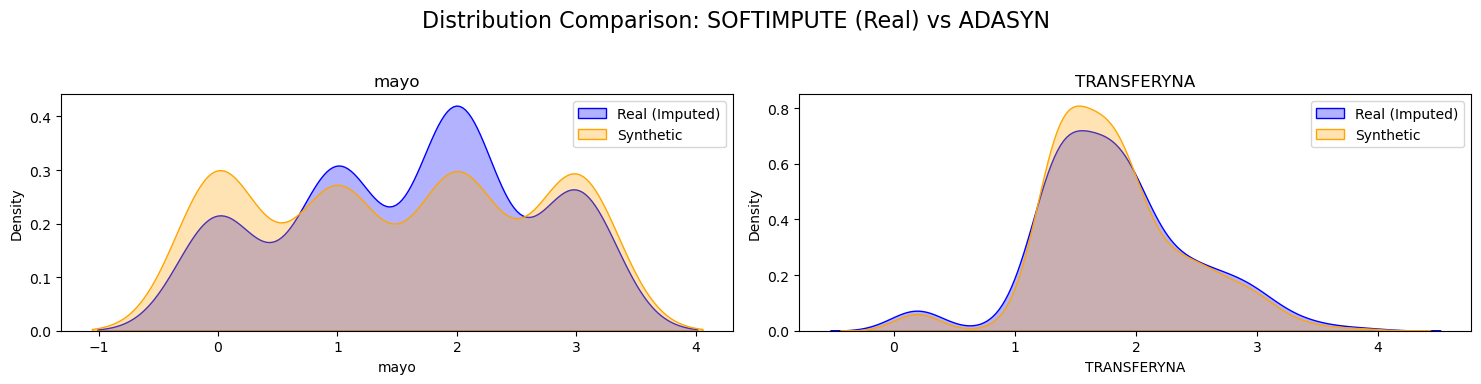

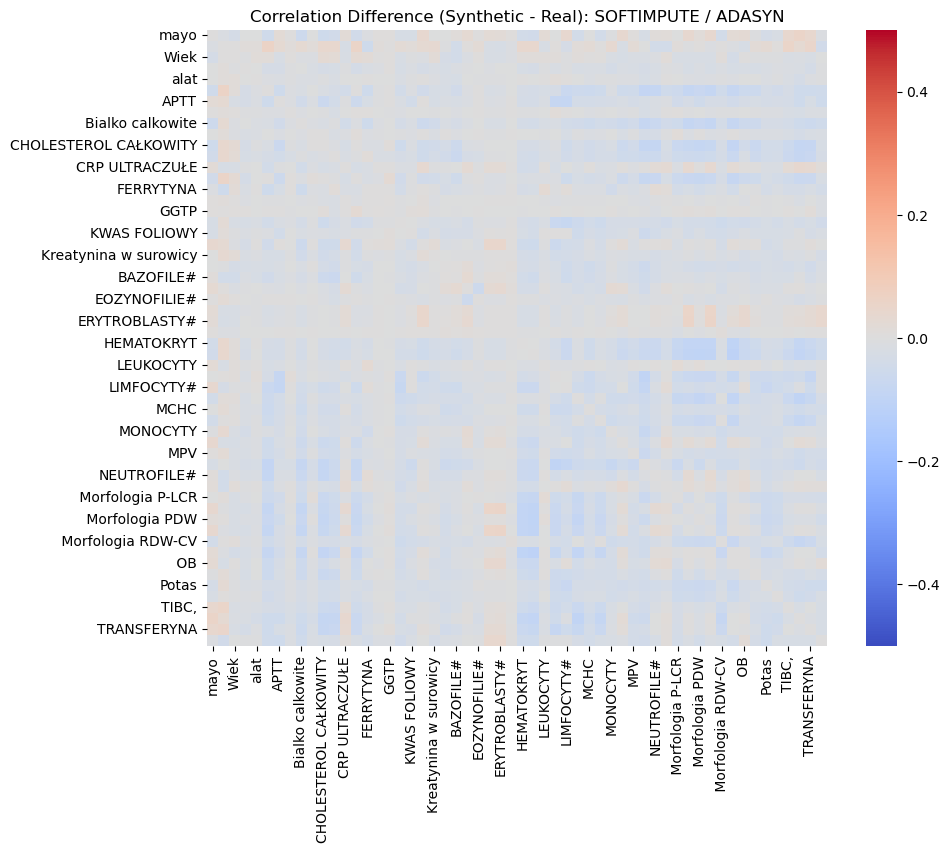

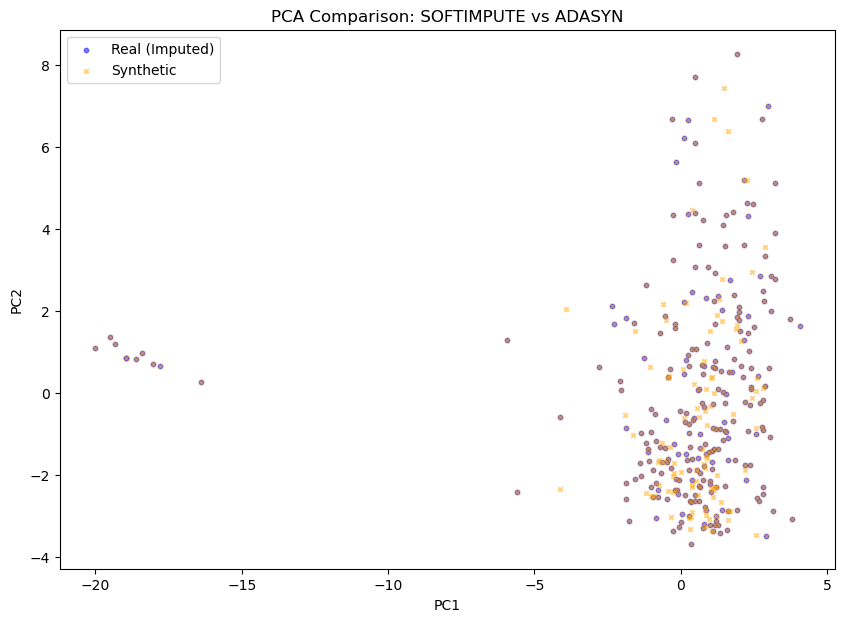


############################################################
ANALYZING IMPUTATION METHOD: GAIN
############################################################

--- Comparing with CTGAN ---


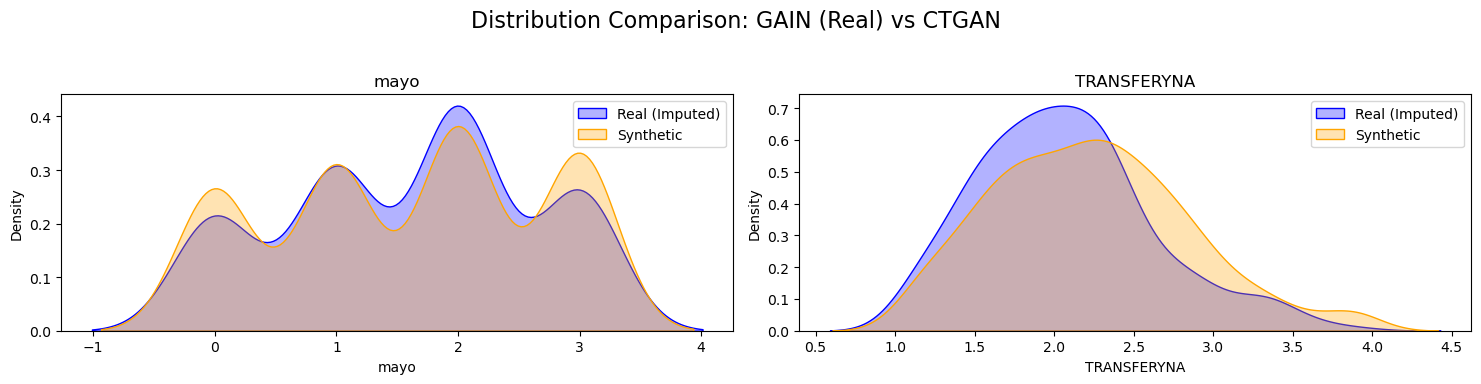

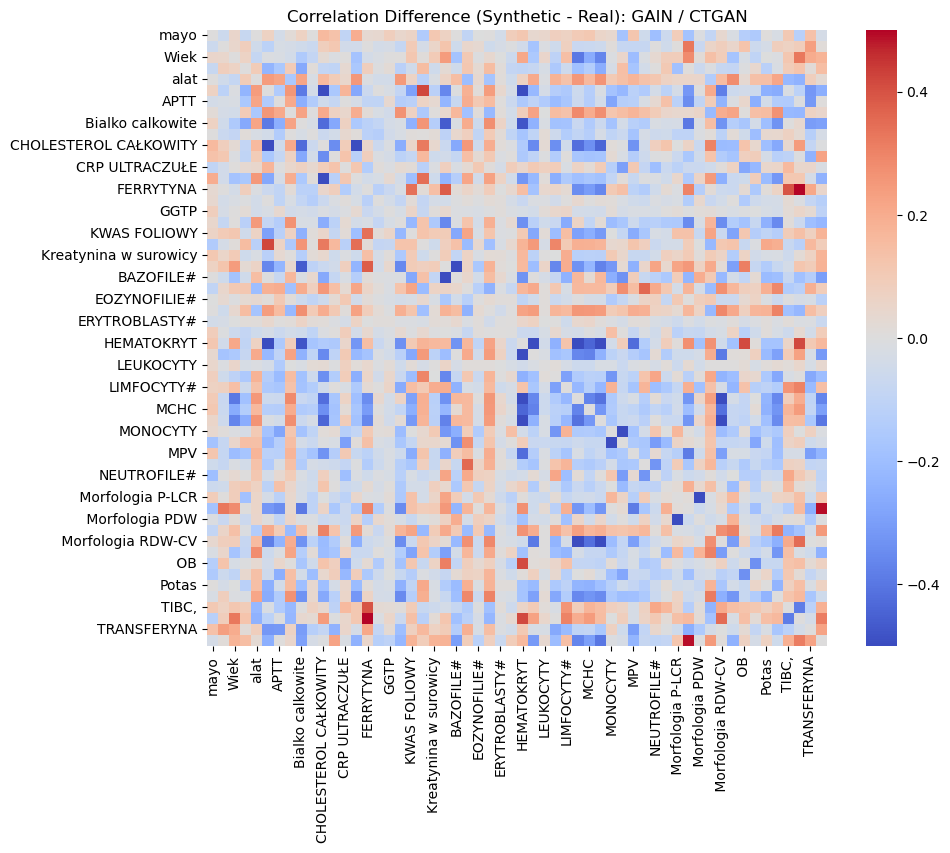

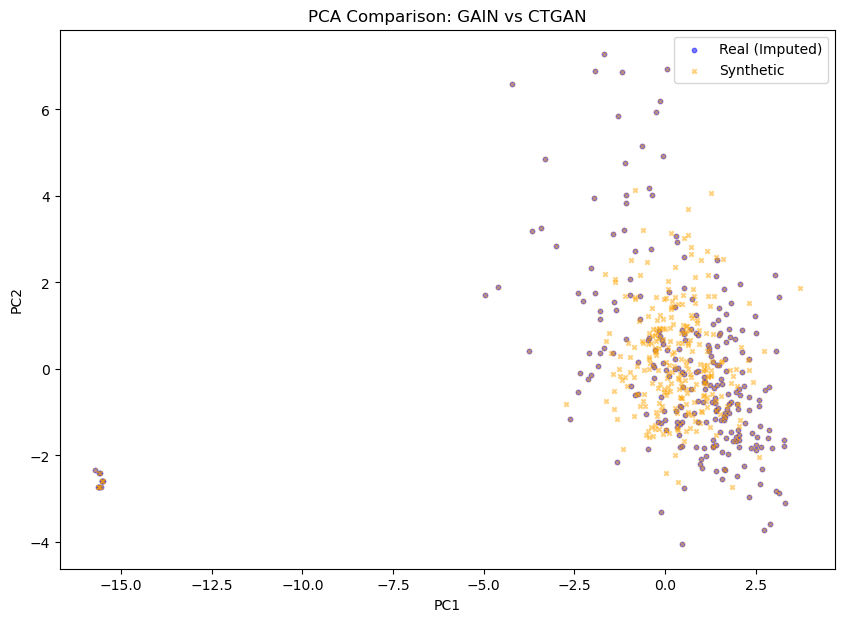

--- Comparing with TVAE ---


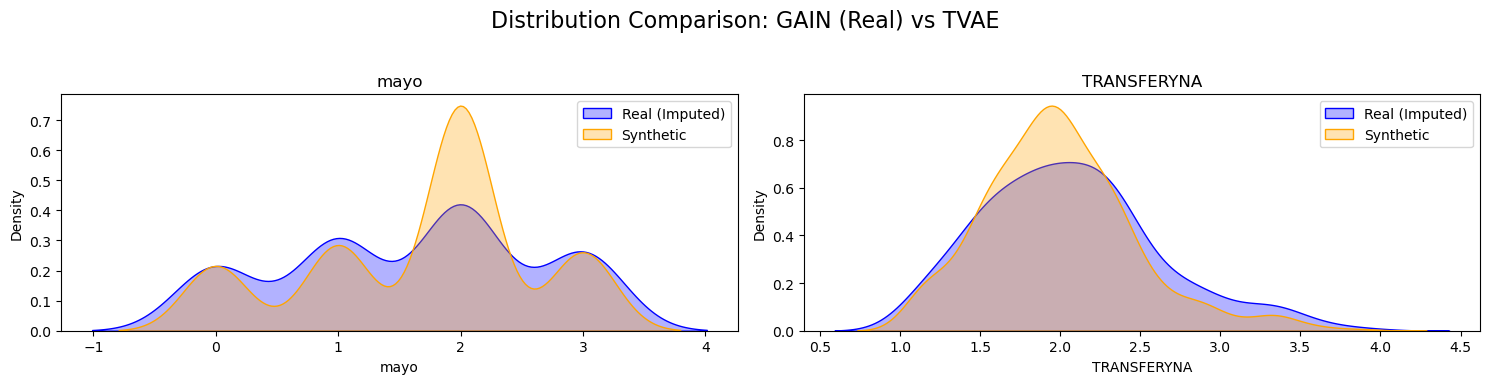

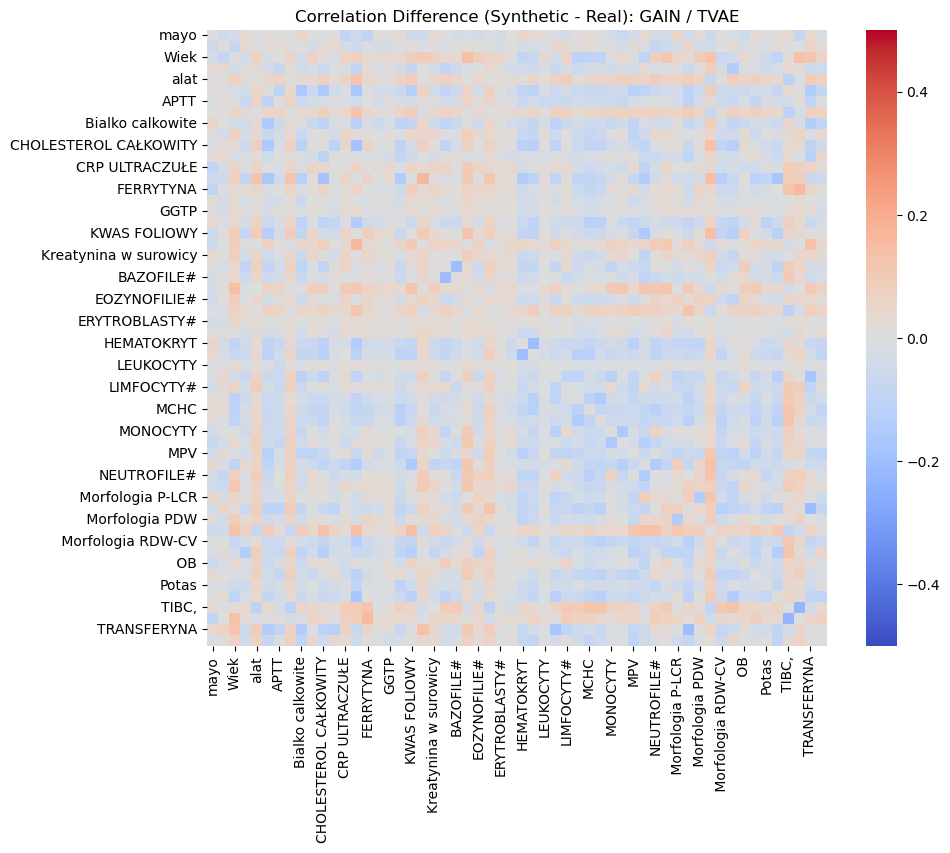

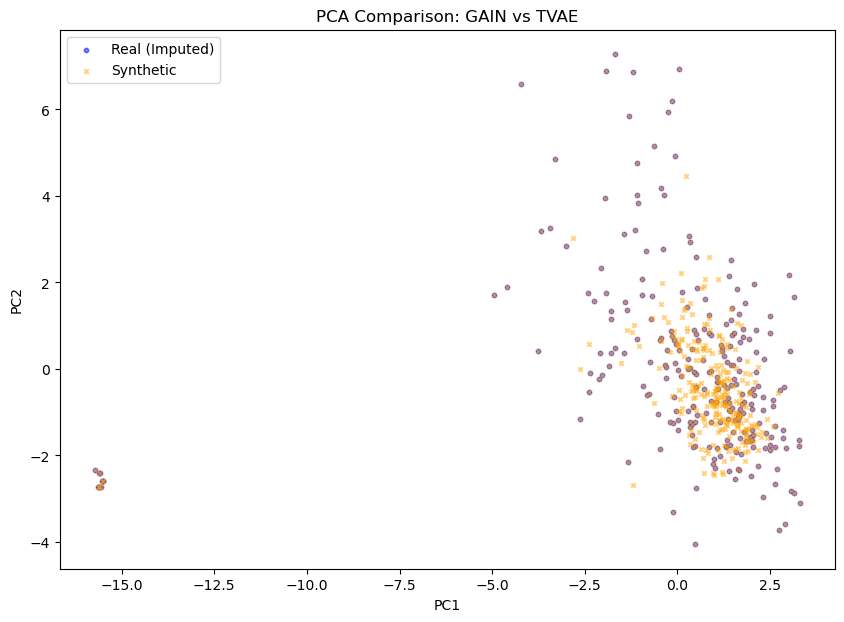

--- Comparing with ADASYN ---


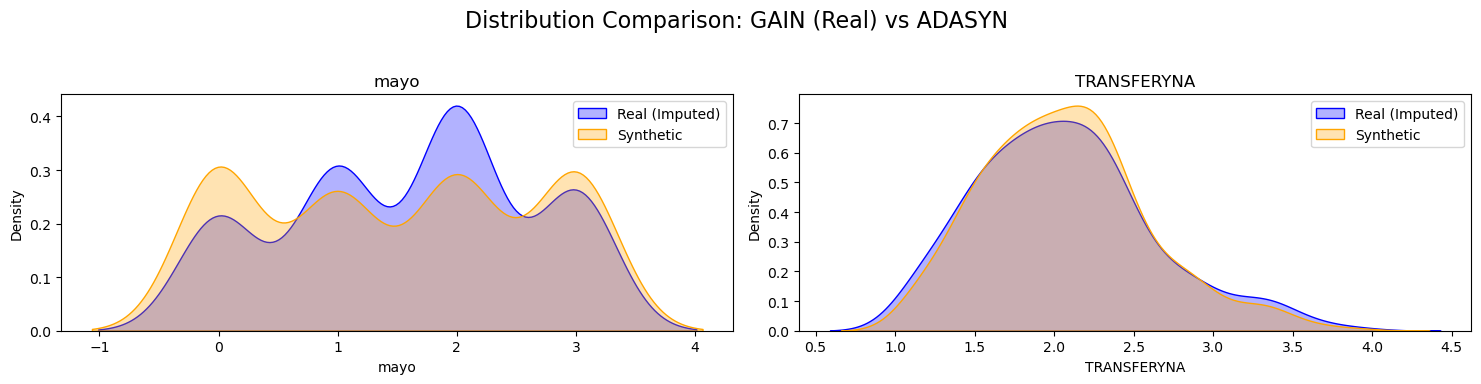

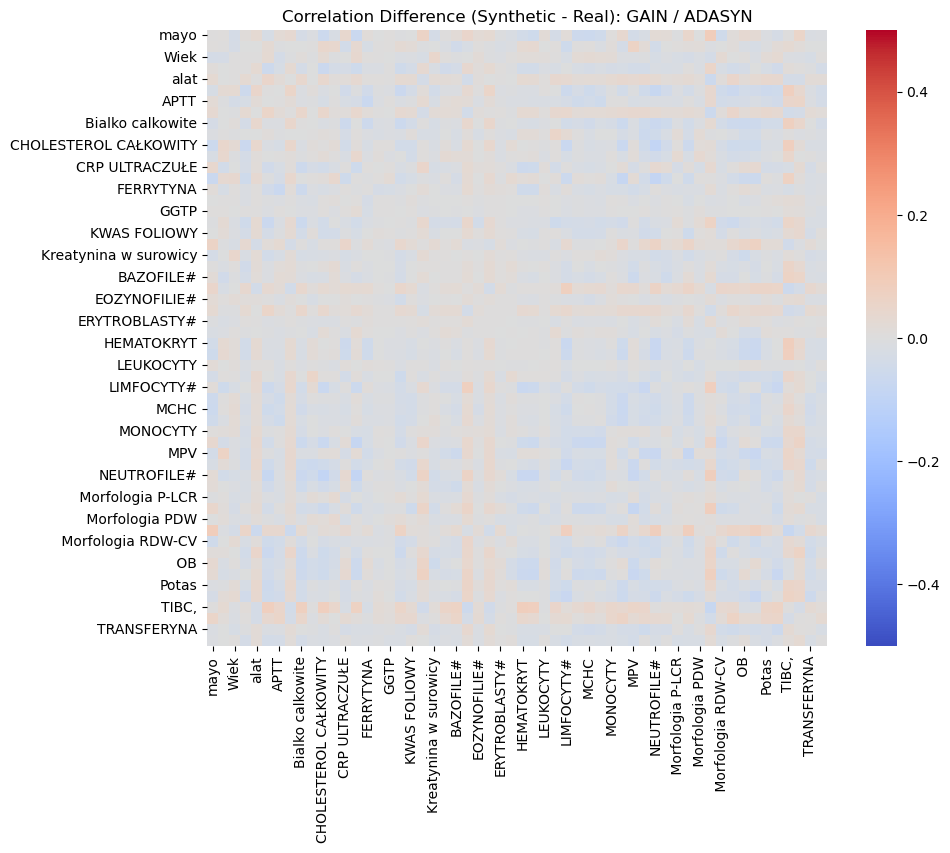

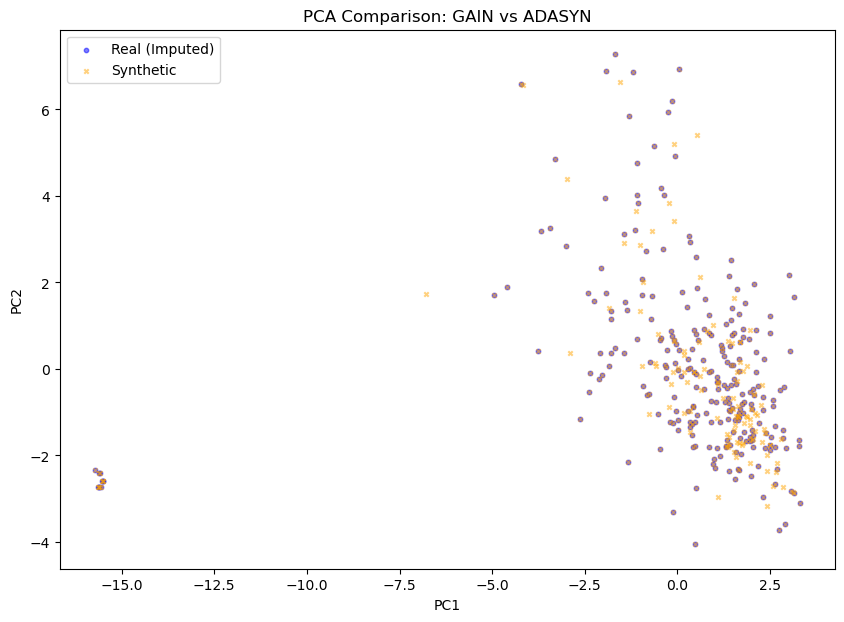


############################################################
ANALYZING IMPUTATION METHOD: PMM
############################################################

--- Comparing with CTGAN ---


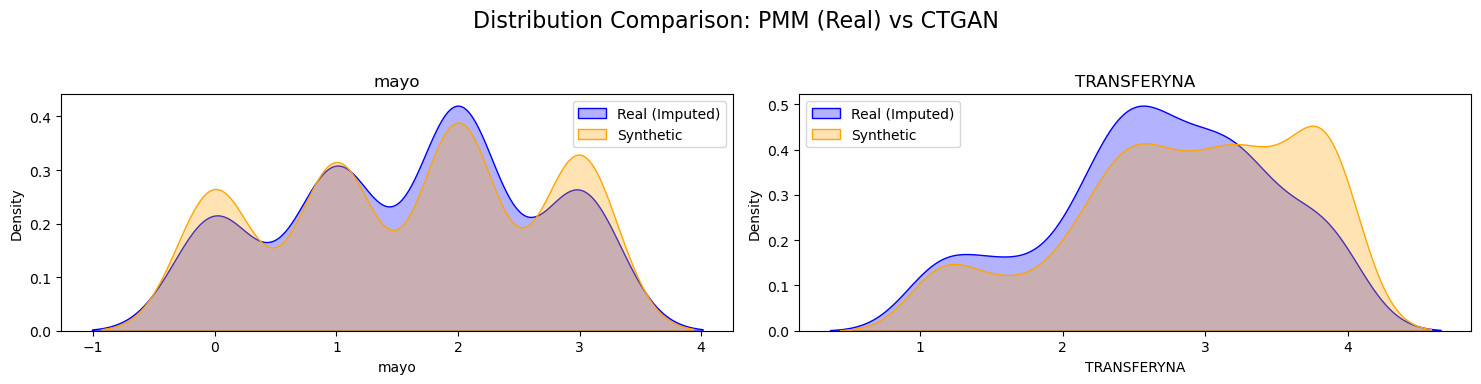

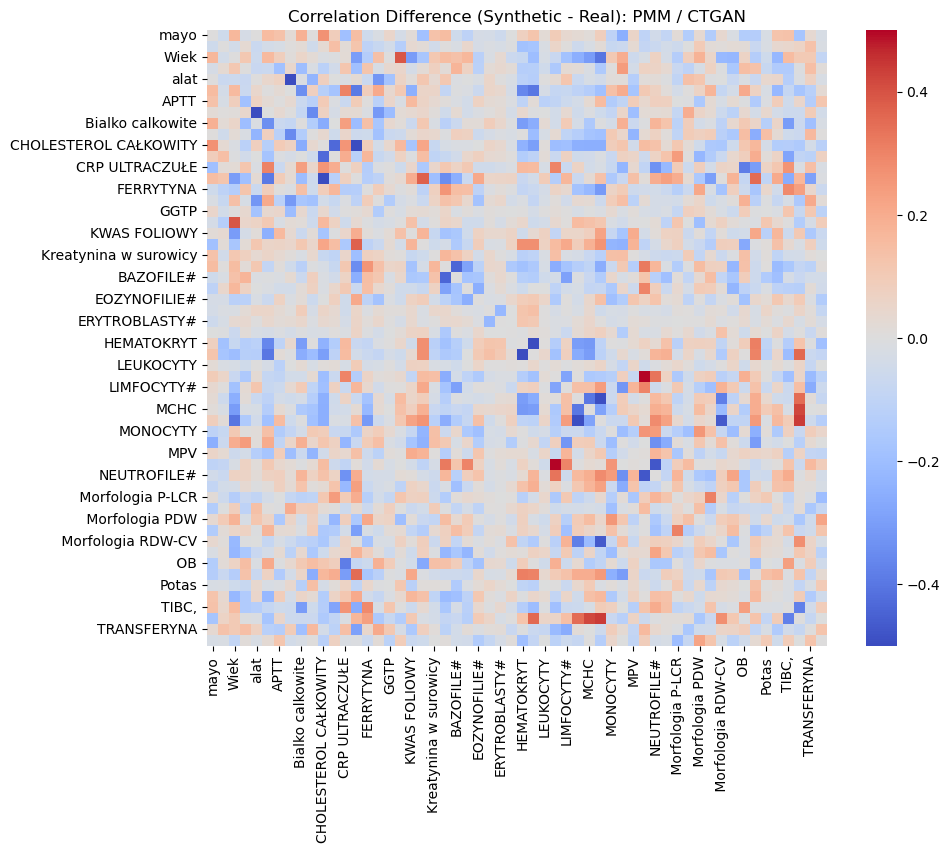

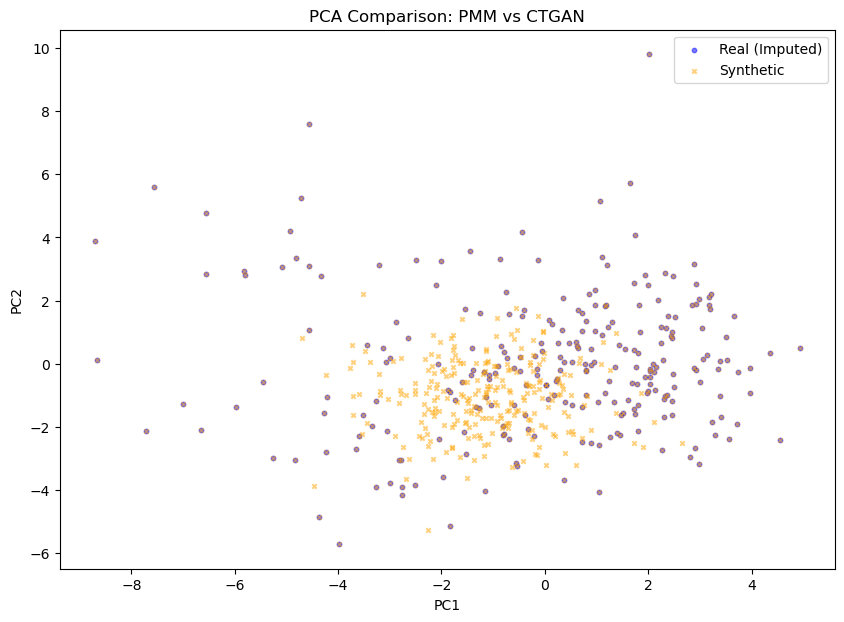

--- Comparing with TVAE ---


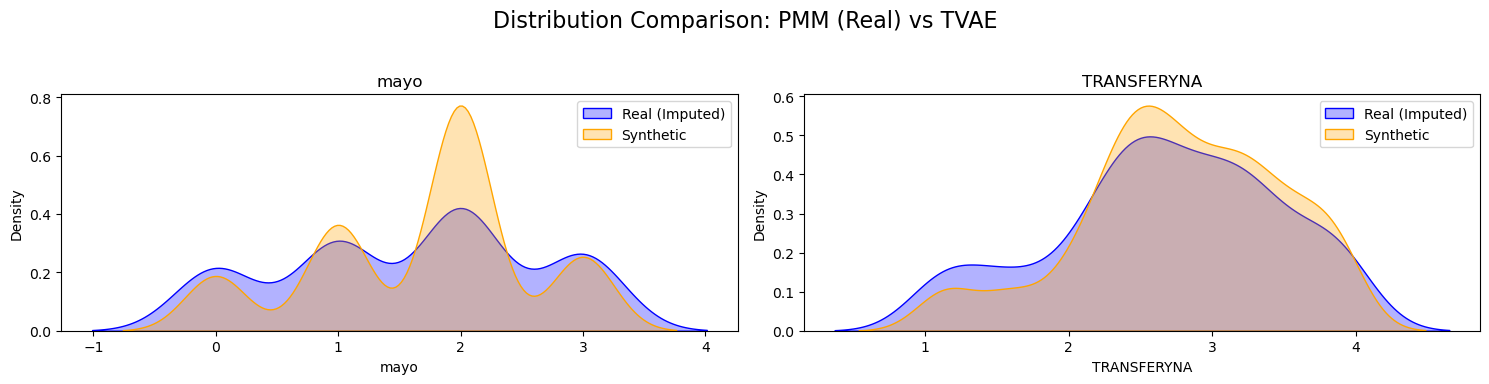

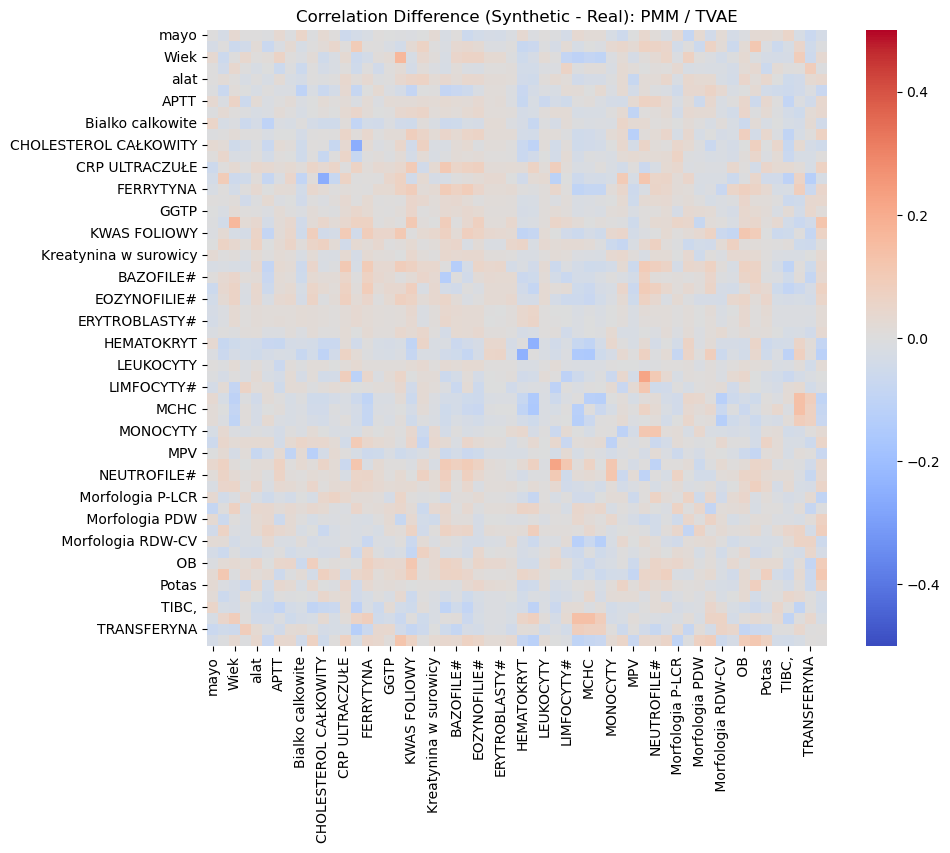

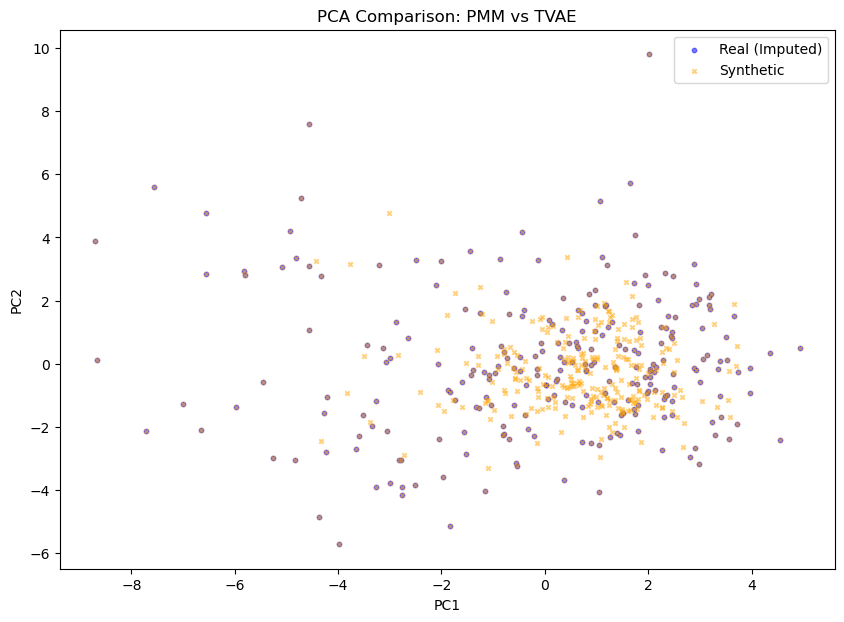

--- Comparing with ADASYN ---


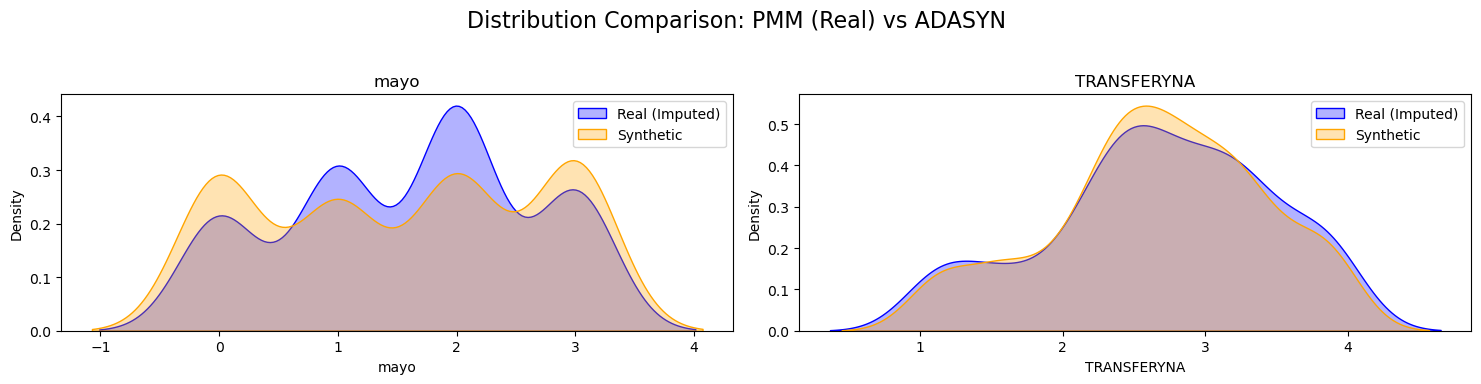

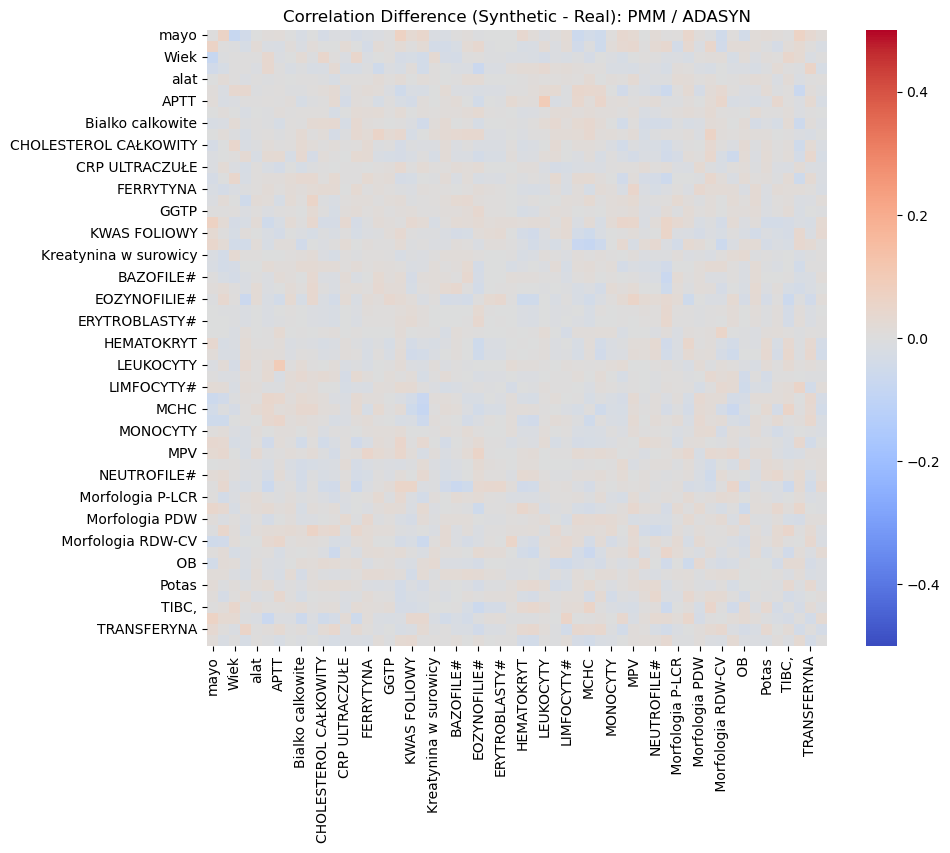

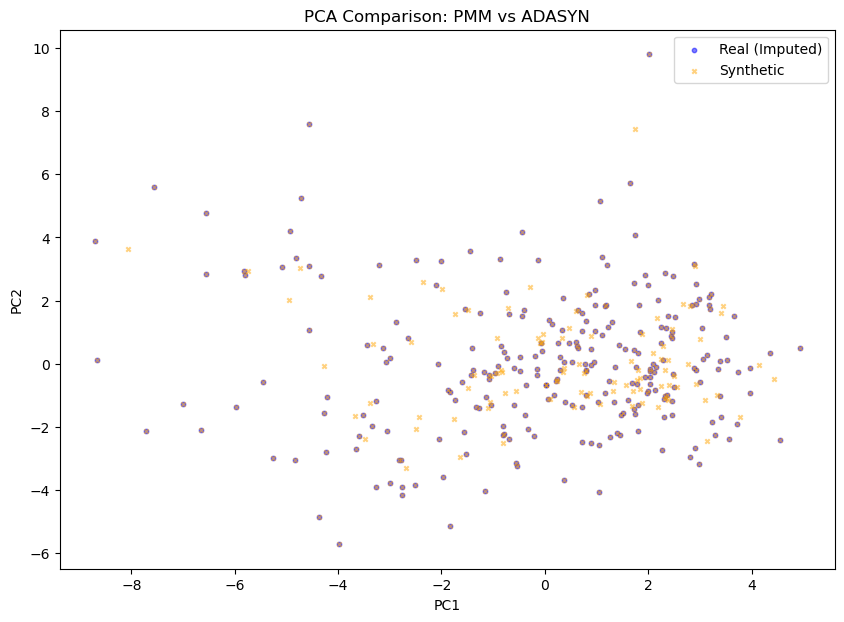

In [4]:
for method in imputation_methods:
    print(f"\n{'#'*60}")
    print(f"ANALYZING IMPUTATION METHOD: {method.upper()}")
    print(f"{'#'*60}\n")
    
    # Load Real Data
    real_path = f'{processed_dir}/uc_diagnostic_tests_{method}.csv'
    if not os.path.exists(real_path):
        print(f"Real data file not found: {real_path} -- Skipping.")
        continue
        
    df_real = pd.read_csv(real_path)
    
    # Select numeric columns for analysis (assuming dataset is mostly numeric, but filtering is safe)
    numeric_cols = df_real.select_dtypes(include=[np.number]).columns
    df_real_num = df_real[numeric_cols]

    for syn_type in synthetic_types:
        print(f"--- Comparing with {syn_type.upper()} ---")
        
        syn_path = f'{synthetic_base_dir}/{method}/uc_diagnostics_{syn_type}.csv'
        if not os.path.exists(syn_path):
            print(f"Synthetic data file not found: {syn_path} -- Skipping.")
            continue
            
        df_syn = pd.read_csv(syn_path)
        df_syn_num = df_syn[numeric_cols]
        
        # 1. Distributions
        plot_distributions(df_real_num, df_syn_num, method, syn_type, key_features)
        
        # 2. Correlations
        plot_correlation_difference(df_real_num, df_syn_num, method, syn_type)
        
        # 3. PCA
        plot_pca_comparison(df_real_num, df_syn_num, method, syn_type)